# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import random 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def rolling():
    list = [1, 2, 3, 4, 5, 6]
    results = random.choices(list, k=10)
    df = pd.DataFrame(results,columns=['Roll Result'])    
    return df
    

#### 2.- Plot the results sorted by value.

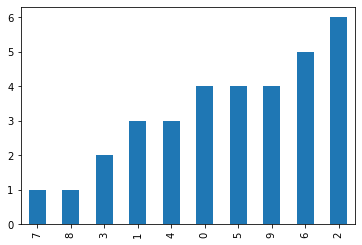

In [3]:
'''Remember to uncomment the function call!'''

#attemp = rolling()
fig, ax = plt.subplots()
attemp['Roll Result'].sort_values().plot(ax=ax, kind='bar');

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
attemp['Roll Result'].value_counts()


4    3
3    2
1    2
6    1
5    1
2    1
Name: Roll Result, dtype: int64

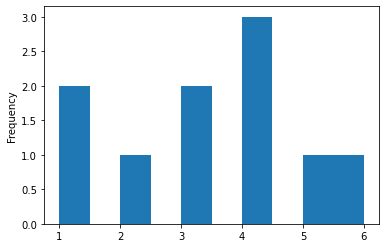

In [88]:
fig, ax = plt.subplots()
attemp['Roll Result'].plot(ax=ax, kind='hist');

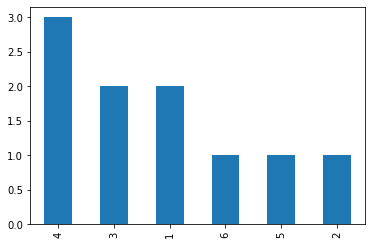

In [87]:
'''Another option with the same results'''

fig, ax = plt.subplots()
attemp['Roll Result'].value_counts().plot(ax=ax, kind='bar');

In [6]:
"""
The first plot shows the result of every time we roll the dice, ordered by value (axis Y) 
but linked to the attemp possition (axis X).
While the second plot just tells us about how many times every result came up after ten attemps, with no order.
"""

'\nThe first plot shows the result of every time we roll the dice, ordered by value (axis Y) \nbut linked to the attemp possition (axis X).\nWhile the second plot just tells us about how many times every result came up after ten attemps, with no order.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def rollmean(df):
    return df.sum()/df.size

In [58]:
print(f"The mean value is {rollmean(attemp['Roll Result'])}.")

The mean value is 3.3.


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [15]:
def freqmean(df):
    newdf = df.value_counts().reset_index()
    newdf['value'] = newdf['Roll Result'] * newdf['index']
    
    return newdf['value'].sum()/newdf['Roll Result'].sum()


In [57]:
print(f"The mean value is {freqmean(attemp['Roll Result'])}.") 

The mean value is 3.3.


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [59]:
'''This funcion uses the integer division to get rid of the odd lenghts calculations.'''

def median(df):
    L = df.sort_values()
    n = len(L)
    m = n - 1
    return (L[n//2] + L[m//2]) / 2
    

In [60]:
print(f"The median value is {median(attemp['Roll Result'])}.") 

The median value is 3.5.


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [65]:
def quartiles(df):
    L = df.sort_values().unique()
    n = len(L)
    m = n - 1
    q2 = (L[n//2] + L[m//2]) / 2
    q1 = q2/2
    q3 = q2*1.5
    return q1, q2, q3
    

In [68]:
print(f"Quartiles Q1, Q2 and Q3 are {quartiles(attemp['Roll Result'])}.") 

Quartiles Q1, Q2 and Q3 are (1.75, 3.5, 5.25).


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

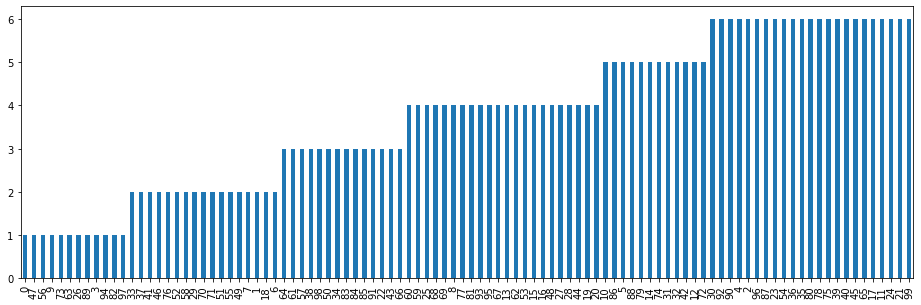

In [80]:
data = pd.read_csv("../data/roll_the_dice_hundred.csv")
fig, ax = plt.subplots(figsize=(16,5))
data['value'].sort_values().plot(ax=ax, kind='bar');

In [82]:
"""
Rolling the dice one hundred times, we got an unequal number of results for every number even though the probability of getting every number is the same for all of them
"""

'\nRolling the dice one hundred times, we got an unequal number of results for every number even though the probability of getting every number is the same for all of them\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [84]:
print(f"The standard mean value is {rollmean(data['value'])}.")
print(f"The freqency mean value is {rollmean(data['value'])}.")

The standard mean value is 3.74.
The freqency mean value is 3.74.


#### 3.- Now, calculate the frequency distribution.


In [85]:
data['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

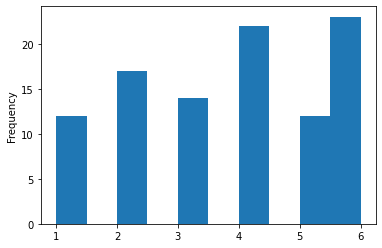

In [89]:
fig, ax = plt.subplots()
data['value'].plot(ax=ax, kind='hist');

In [92]:
"""
Histogram plot let us see visually that the distribution tends to the right, meaning that greater numbers appear more often that smaller ones. We had a clue in the frequency distribution, as six and four were at the top. 

The mean was also yelling that our distribution is biased by the big players, as is bigger than the median.
"""

'\nHistogram plot let us see visually that the distribution tends to the right, meaning that greater numbers appear more often that smaller ones. We had a clue in the frequency distribution, as six and four were at the top. \n\nThe mean was also yelling that our distribution is biased by the big players, as is bigger than the median.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

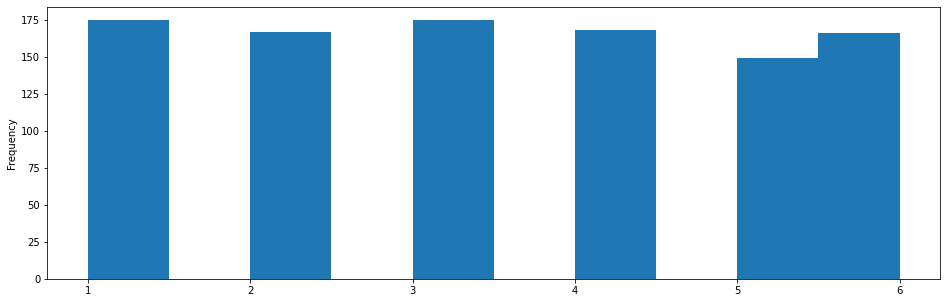

In [94]:
thousand_rolls = pd.read_csv("../data/roll_the_dice_thousand.csv")
fig, ax = plt.subplots(figsize=(16,5))
thousand_rolls['value'].plot(ax=ax, kind='hist');

In [95]:
"""
This is a totally different distribution to my eyes. This time around, frequency is far more balanced and difference between the most and the less common result is pretty small.

The reason for this balanced distribution is that the bigger the population, the closer it gets to the calculated probability. In this case 1/6 for each number in a fair dice.
"""

'\nThis is a totally different distribution to my eyes. This time around, frequency is far more balanced and difference between the most and the less common result is pretty small.\n\nThe reason for this balanced distribution is that the bigger the population, the closer it gets to the calculated probability. In this case 1/6 for each number in a fair dice.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
# your code here

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""